# **AP157 Module C Lab Assignment**

## Module C1: Networks

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.

_Credits_: The sample social network used is taken from https://nauczanki.wordpress.com/2014/11/10/social-network-analysis-basics-in-300-words-dalmooc-assignment-week-3/, which in turn is taken from an unspecified MOOC assignment.

### Student Information

_Full Name (Last Name, First Name)_: Quiamjot, Allyn Christian\
_Student No._: 2021-07198\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: May 23, 2024 3:42 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: ALLYN CHRISTIAN I. QUIAMJOT**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/30
* Part 4 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For all parts of this assignment,  refer to the diagram of the sample social network in the Google Drive "Datasets" Folder (https://drive.google.com/file/d/1DkAK44GfocX0bmlSfK5Q6cbYXAUkixyj/view?usp=drive_link)

#### PART 1 - Network generation and characteristics *(30 points)*

1. Using the Python package networkx, define a network that represents the social network of friends in the diagram. *(15 points)*  

2. Calculate the ff. network characteristics: *(15 points; 5 points each)*
- Diameter
- Density
- Average Degree

3. Create the degree distribution plot and briefly discuss what it tells us about this social network. *(10 points)*

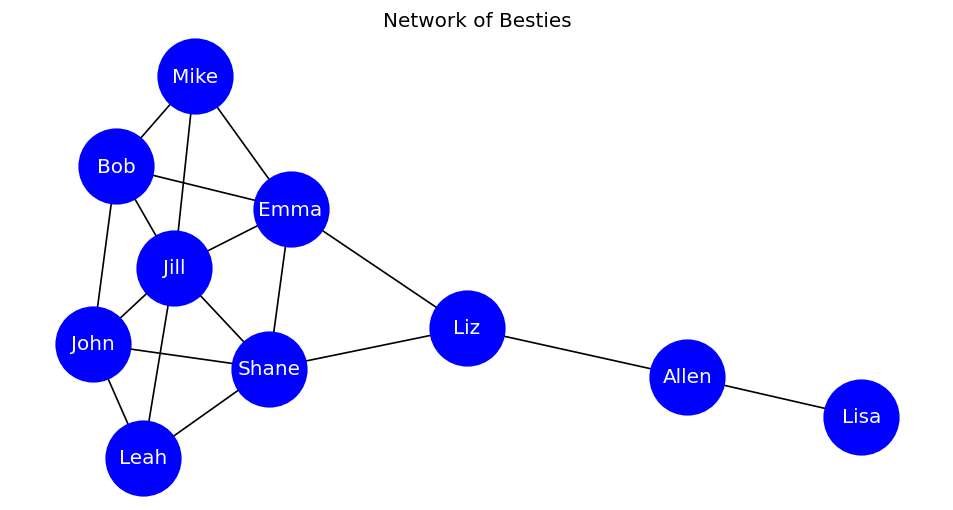

In [46]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# creating the netwwork
G = nx.Graph()
addNodes = ['Bob', 'Mike', 'Jill', 'John', 'Leah', 'Shane', 'Emma', 'Liz', 'Allen', 'Lisa']    
addEdges = [('Bob', 'Mike'), ('Bob', 'Jill'), ('Bob', 'John'), ('Bob', 'Emma'),                 
            ('John', 'Jill'), ('John','Shane'), ('John', 'Leah'),
            ('Jill', 'Leah'), ('Jill', 'Shane'), ('Jill', 'Emma'),
            ('Leah', 'Shane'),
            ('Mike', 'Emma'), ('Mike', 'Jill'),
            ('Emma', 'Shane'), ('Emma', 'Liz'),
            ('Shane', 'Liz'), ('Liz', 'Allen'), ('Allen', 'Lisa')
]
G.add_nodes_from(addNodes)              # initializing nodes
G.add_edges_from(addEdges)              # initializing edges
my_pos = nx.spring_layout(G, seed = 100)

plt.figure(figsize=(10,5), dpi = 120)
plt.title('Network of Besties')

# showing the network as a graph
nx.draw(G,
        pos=my_pos,
        with_labels=True,
        node_color='blue',
        node_size=2000,
        font_color='white',
        font_size=12,
        )
plt.show()

Shown above is the network of friends formed by Mike, Bob, Emma, Jill, John, Shane, Lea, Liza, Allen, and Lisa.

In [47]:
nodes = G.number_of_nodes()
edges = G.number_of_edges()

D = nx.diameter(G) # calculating network diameter
nd = (edges)/((nodes*(nodes-1))/2)  # calculating network density
degree = (2*edges)/nodes        # average degree formula for an undirected network

print('Diameter:\t\t',D)
print('Network Density:\t',nd)
print('Average Degree:\t\t',degree)


Diameter:		 4
Network Density:	 0.4
Average Degree:		 3.6


The diameter tells us the longest shortest path between any two nodes in a network. In this case, the diameter is 4. This is because the path from Lisa to Leah, John, Jill, Bob, and Mike is the longest shortest path, which is 4. The network density determines how interconnected the nodes are. A network density of 1 means that all the network possess all the possible connections given the number of nodes. Network density in this case is 0.4 which means that the number of edges/connections are less than half the total number of possible edges/connections. The average degree is the average number of edges connected to a node. The network we are analyzing in this case is undirected which means that the direction of connections go in two ways. Thus, average degree is simply $\frac{2 \times \text{edges}}{\text{nodes}}$. The average degree in this case is 3.6.

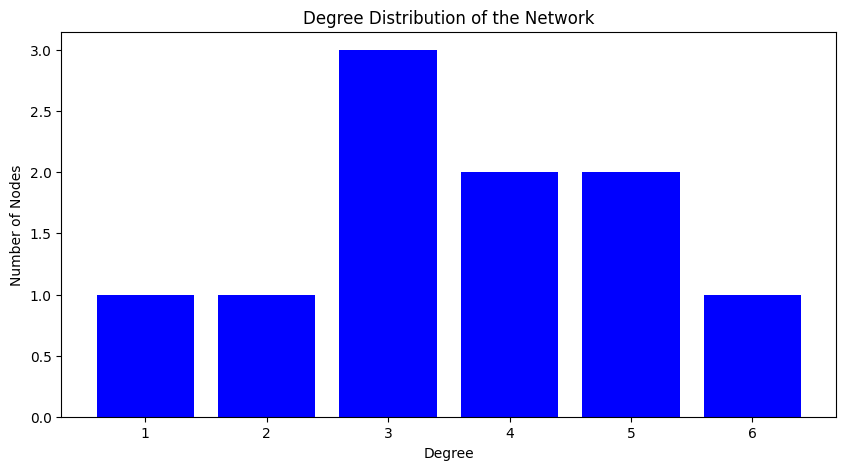

In [48]:
degree_counts = {}

for node, degree in G.degree():
  if degree in degree_counts:
    degree_counts[degree] += 1
  else:
    degree_counts[degree] = 1

degrees = list(degree_counts.keys())
counts = list(degree_counts.values())

plt.figure(figsize=(10,5),dpi=100)
plt.bar(degrees, counts, color='blue')
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution of the Network")
plt.show()

Shown above is the degree distribution of the network. It was found out that the degree the most number of appearance was 3, showing up in 3 nodes out of 10. This suggests that 30% of the nodes are connected to 3 other nodes. There is a single node that only has a degree of 1. The same goes of degree of 2 and degree of 6. Low degrees indicate that nodes that are "isolated". From the distribution, we can say that there is less isolated nodes compared to the more interconnected nodes. Nodes with higher degrees such as 4,5, and 6 act as connectors or strong influencers in the network. These nodes act like a glue, holding the network together.

#### PART 2 - Centrality Measures *(30 points)*

Generate a table of centrality measures per node. Columns are:
- Name
- Degree Centrality
- Betweenness Centrality
- Closeness Centrality

Briefly discuss who are the most "central" people in the social network and why.

In [49]:
deg = nx.degree_centrality(G)               # calculating degree centrality
betweenness = nx.betweenness_centrality(G)  # calculating betweenness centrality
closeness = nx.closeness_centrality(G)      # calculating closeness centrality

df = pd.DataFrame(columns=['Name', 'Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality'])
df = pd.DataFrame({'Name': G.nodes})
df['Degree Centrality'] = deg.values()
df['Betweenness Centrality'] = betweenness.values()
df['Closeness Centrality'] = closeness.values()


In [50]:
df.sort_values(by=['Degree Centrality'],ascending=False)    # sorted by degree centrality

,Name,Degree Centrality,Betweenness Centrality,Closeness Centrality
2,Jill,0.666667,0.101852,0.600000
5,Shane,0.555556,0.231481,0.642857
6,Emma,0.555556,0.231481,0.642857
0,Bob,0.444444,0.023148,0.529412
3,John,0.444444,0.023148,0.529412
1,Mike,0.333333,0.000000,0.500000
4,Leah,0.333333,0.000000,0.500000
7,Liz,0.333333,0.388889,0.600000
8,Allen,0.222222,0.222222,0.428571
9,Lisa,0.111111,0.000000,0.310345


The person with the highest degree centrality is Jill. This means that Jill is the person in the network with the most number of connections/edges. Conversely, Lisa has the least degree centrality which denotes that Lisa has the least number of connections. Since this is a social network, we can also say that Jill has the most number of friends while Lisa has the least.

In [51]:
df.sort_values(by=['Betweenness Centrality'],ascending=False)   # sorted by betweenness centrality

,Name,Degree Centrality,Betweenness Centrality,Closeness Centrality
7,Liz,0.333333,0.388889,0.600000
5,Shane,0.555556,0.231481,0.642857
6,Emma,0.555556,0.231481,0.642857
8,Allen,0.222222,0.222222,0.428571
2,Jill,0.666667,0.101852,0.600000
0,Bob,0.444444,0.023148,0.529412
3,John,0.444444,0.023148,0.529412
1,Mike,0.333333,0.000000,0.500000
4,Leah,0.333333,0.000000,0.500000
9,Lisa,0.111111,0.000000,0.310345


The person with the highest betweenness centrality is Liz. This means that Liz is the person that appears the most when traversing the shortest paths in the network. In the context of a social network, Liz connects most of the people in the network. When a person tries to contact another person, Liza is most likely contacted first in order to reach the target person. Conversely, Mike, Leah, and Lisa have the least betweenness centrality which is 0. They do not appear in any of the shortest paths.

In [52]:
df.sort_values(by=['Closeness Centrality'],ascending=False)     # sorted by closeness centrality

,Name,Degree Centrality,Betweenness Centrality,Closeness Centrality
5,Shane,0.555556,0.231481,0.642857
6,Emma,0.555556,0.231481,0.642857
2,Jill,0.666667,0.101852,0.600000
7,Liz,0.333333,0.388889,0.600000
0,Bob,0.444444,0.023148,0.529412
3,John,0.444444,0.023148,0.529412
1,Mike,0.333333,0.000000,0.500000
4,Leah,0.333333,0.000000,0.500000
8,Allen,0.222222,0.222222,0.428571
9,Lisa,0.111111,0.000000,0.310345


Closeness centrality determines how "close" a node is to all other nodes in the network. It involves determining the minimum number of edges that must be traversed to travel from one node to another. The people with the highest closeness centrality are Shane and Emma. This means that Shane and Emma can quickly reach all other nodes. Conversely, Lisa has the least closeness centrality, resulting to Lisa being further away from all other nodes. It also takes longer for Lisa to reach any other nodes and vice versa.

#### PART 3 - Identify communities *(40 points)*

1. Identify communities in the social network using *(30 points)*:
- Louvain community detection algorithm
- Any other community detection algorithm of your choice

2. Calculate the modularity of the partitions from the two community detection algorithms. *(10 points)*

Briefly describe the algorithm you used and compare the results from the two algorithms.

In [53]:
comm_louvain = nx.community.louvain_communities(G, seed=1234567890)
comm_louvain

[{'Bob', 'Emma', 'Jill', 'Mike'},
 {'John', 'Leah', 'Shane'},
 {'Allen', 'Lisa', 'Liz'}]

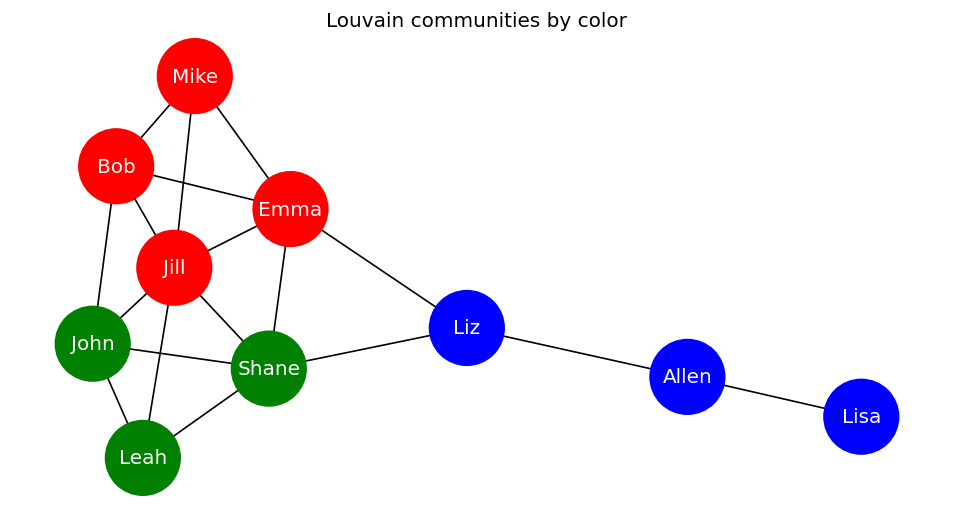

In [54]:
node_colors = []
color_map = ['r', 'g','b']  # preferred colors
for node in G.nodes():
  community_found = False
  for i, community in enumerate(comm_louvain):
    if node in community:
      node_colors.append(color_map[i % len(color_map)])  # Use modulo to handle more communities than colors
      community_found = True
      break  # Exit inner loop once community is found for the node

pos = nx.spring_layout(G, seed=100)  # Get node positions 
plt.figure(figsize=(10,5), dpi = 120)
plt.title('Louvain communities by color')
nx.draw(G, pos=pos, node_color=node_colors, node_size=2000, font_color='white', with_labels=True)
plt.show()

The Louvain community detection method is designed to optimize modularity. Nodes are transferred from one community to another to improve modularity. A node is assigned to a community where greatest modularity is achieved. Communities are then treated as a single node connected to each other in weighted edges. The process if repeated until modularity can no longer be increased. The final output is a community partition where modularity is maximized.

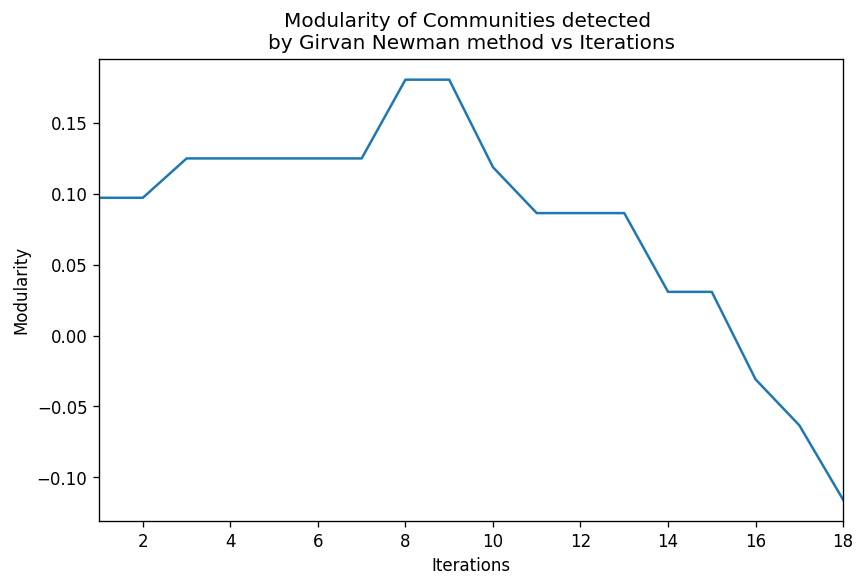

In [55]:
# performing Girvan-Newman algorithm for maximum number of iterations to
# determine best community partitions by modularity
GG = G.copy()
iterations = edges
gen = []
modu = []
for i in range(iterations):
    edge_betweenness = nx.edge_betweenness_centrality(GG).items()           # determining edge betweenness of the edges in the networks
    edgeToDelete = sorted(edge_betweenness, key=lambda pair: -pair[1])[0][0]       # determining the edge with the highest edge betweenness
    GG.remove_edge(*edgeToDelete)           # deleting edge with the highest edge betweenness

    comms = list(nx.connected_components(GG))       # stores the community partitions
    modu_girv = nx.community.modularity(G,comms)    # computes modularity of partition

    gen.append(i+1)     # appends nth iteration in an array for plotting
    modu.append(modu_girv)      # appends modularity in an array for plotting

# plotting modularity vs iterations
plt.figure(figsize=(8,5),dpi=120)
plt.plot(gen,modu)
plt.xlim((1,edges))
plt.title('Modularity of Communities detected \nby Girvan Newman method vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Modularity')
plt.show()

The Girvan-Newman algorithm revolves around the concept of edge betweenness. A community has more internal edges than external edges (edges connecting it to other communities). The algorithm takes advantage of this by determining the edge that appear the most on all shortest paths in a network. This edge usually connects a community to another. This edge is deleted and the connected nodes form a community. This is repeated until optimal community partitions are achieved. When the algorithm is left to run at maximum iterations, all edges are removed which essentially forms communities consisting of single nodes - this is not ideal. Therefore, we must determing optimal number of iterations of the algorithm.

Modularity essentially determines the quality of community partitions. In a nutshell, a community must have more internal edges than external edges. We want a high modularity because in this way, the communities are more defined.

The plot above shows that highest modularity using the Girvan-Newman algorithm is achieved at 8 iterations. Iterations greater than this further led to a decline in modularity. At maximum number of iterations, the modularity is already negative which denotes very poor community structure.

We then perform Girvan-Newman algorithm at the optimal number of iterations.

('Liz', 'Allen')


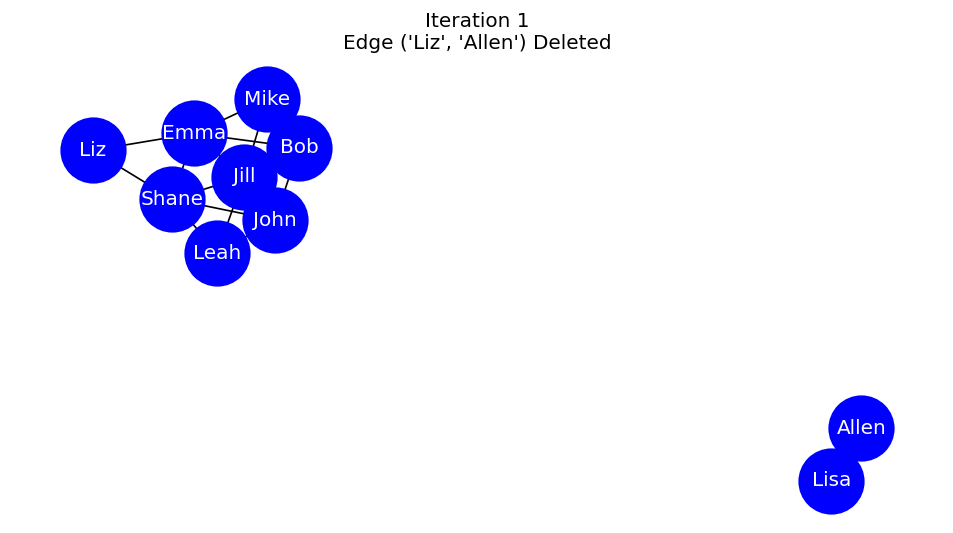

('Shane', 'Liz')


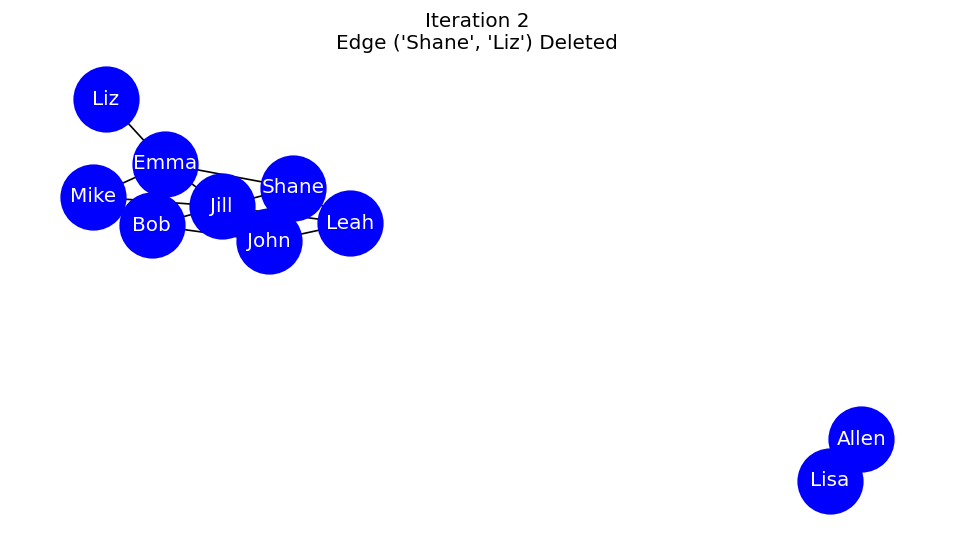

('Emma', 'Liz')


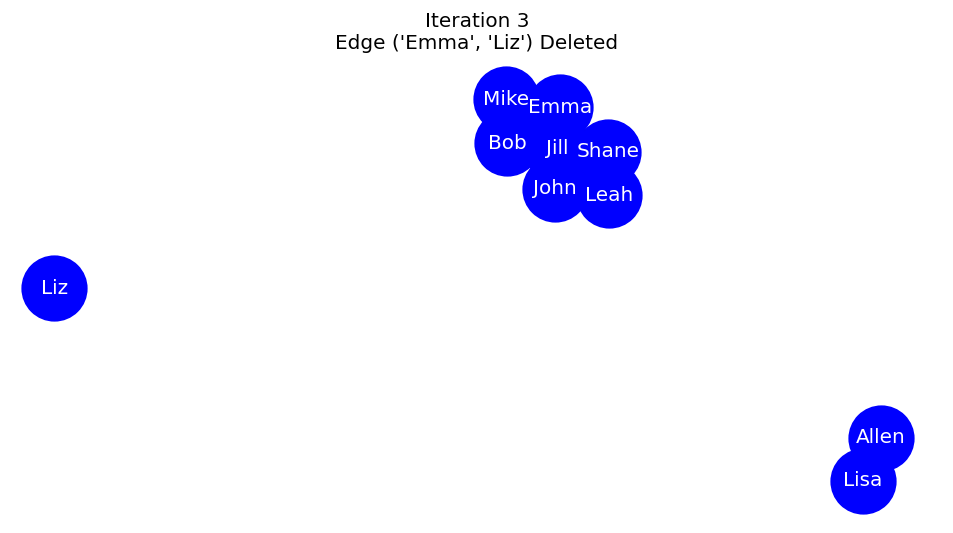

('Mike', 'Jill')


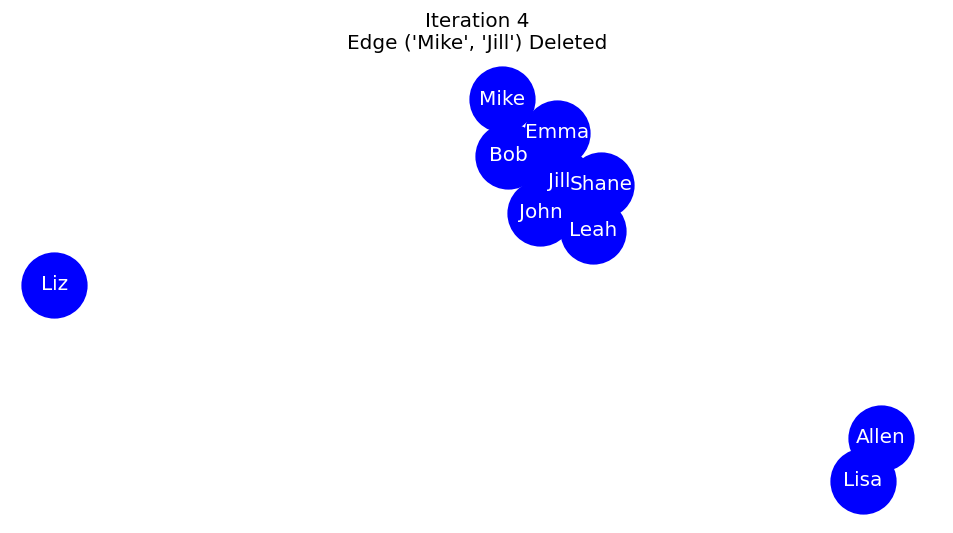

('Shane', 'Emma')


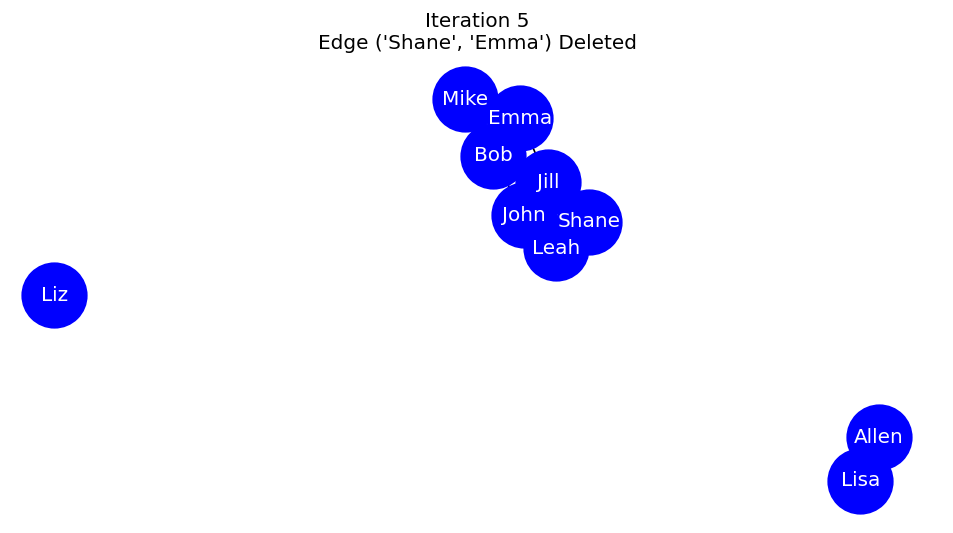

('Jill', 'Emma')


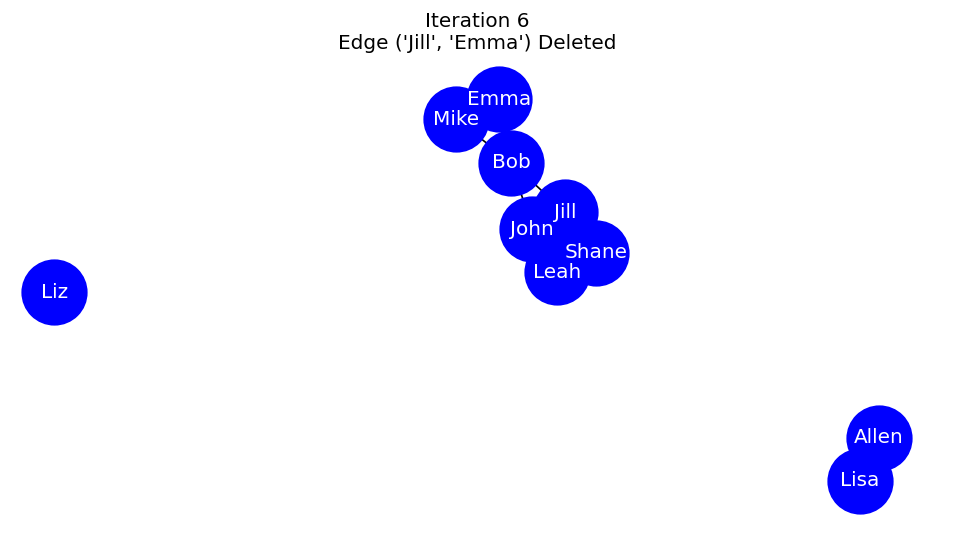

('Bob', 'Jill')


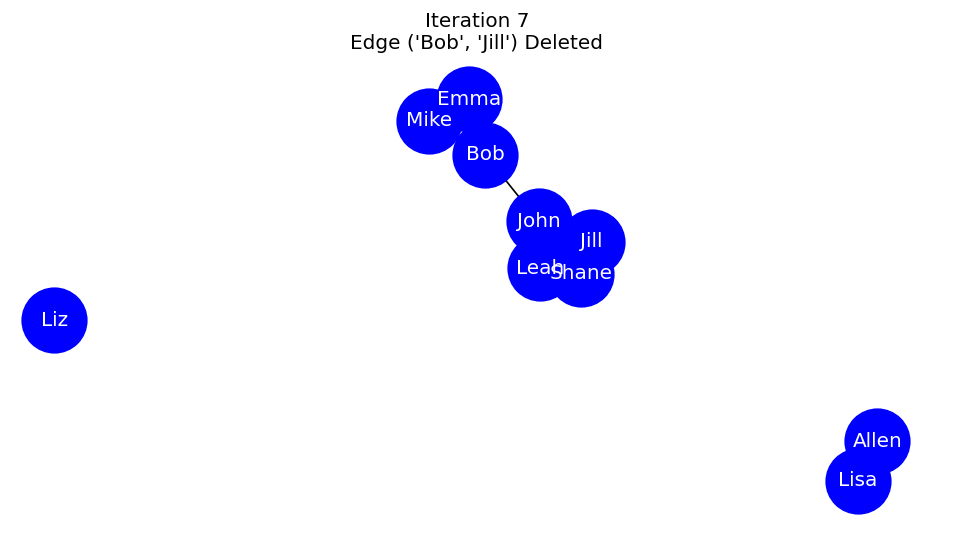

('Bob', 'John')


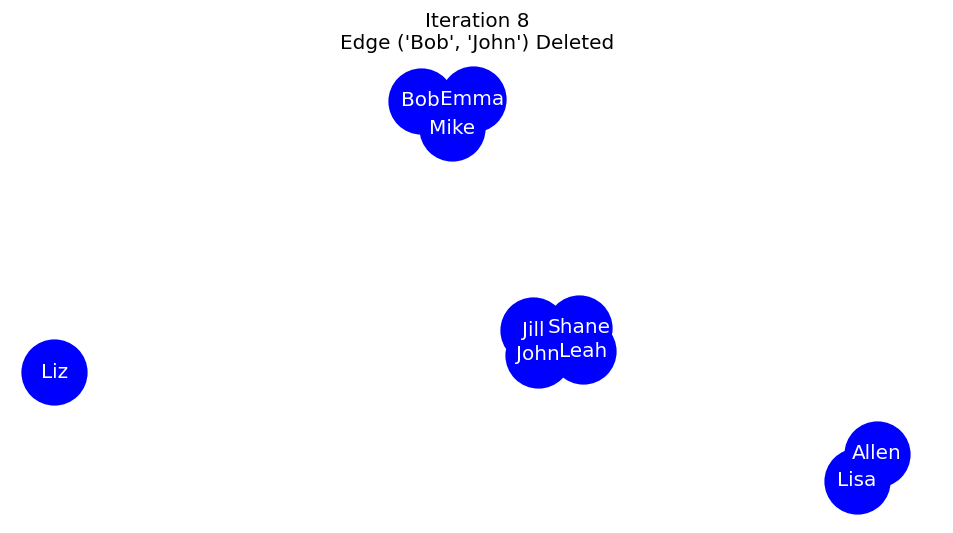

In [56]:
# Girvan-Newman community detection algorithm

GG = G.copy()
iterations = 8      # we have determined 8 to be the optimal iterations 
for i in range(iterations):
    edge_betweenness = nx.edge_betweenness_centrality(GG).items()           # determining edge betweenness of the edges in the networks
    edgeToDelete = sorted(edge_betweenness, key=lambda pair: -pair[1])[0][0]    # determining the edge with the highest edge betweenness
    GG.remove_edge(*edgeToDelete)               # deleting edge with the highest edge betweenness
    
    print(edgeToDelete)

    # plotting the new community 
    plt.figure(figsize=(10,5),dpi=120)
    plt.title('Iteration %s\nEdge %s Deleted'%(i+1,edgeToDelete))
    my_pos = nx.spring_layout(GG, seed = 12)
    nx.draw(GG, pos=my_pos, node_size=1500,font_color='white', with_labels=True, node_color='b')
    plt.show()

In [57]:
# modularity of louvain community partitions
modularity_louvain = nx.community.modularity(G, comm_louvain)
modularity_louvain

0.2222222222222222

In [58]:
# the connected communities are now the community partitions determined by Girvan Newman algorithm
comm_girvan = list(nx.connected_components(GG))
comm_girvan

[{'Bob', 'Emma', 'Mike'},
 {'Jill', 'John', 'Leah', 'Shane'},
 {'Liz'},
 {'Allen', 'Lisa'}]

In [59]:
# modularity of optimal girvan-newman community partitions
modularity_girvan = nx.community.modularity(G,comm_girvan)
modularity_girvan

0.18055555555555552

Modularity of Louvain communities: 0.222

Modularity of optimal Girvan-Newman communities: 0.181

We have observed that modularity of Louvain communities is greater than Girvan-Newman communities, even if the latter method was already done after an optimal iterations. This is due to the way the Louvain algorithm was designed. It prioritized the maximization of modularity. On the other hand, Girvan-Newman method only involves the deletion of edge betweenness. From the two modularities, we can say that the Louvain algorithm performed better than the Girvan-Newman algorithm in detecting communities.